In [1]:
import idx2numpy
import numpy as np
import matplotlib.pyplot as plt
import keras
import tensorflow as tf
import sys

Using TensorFlow backend.


5


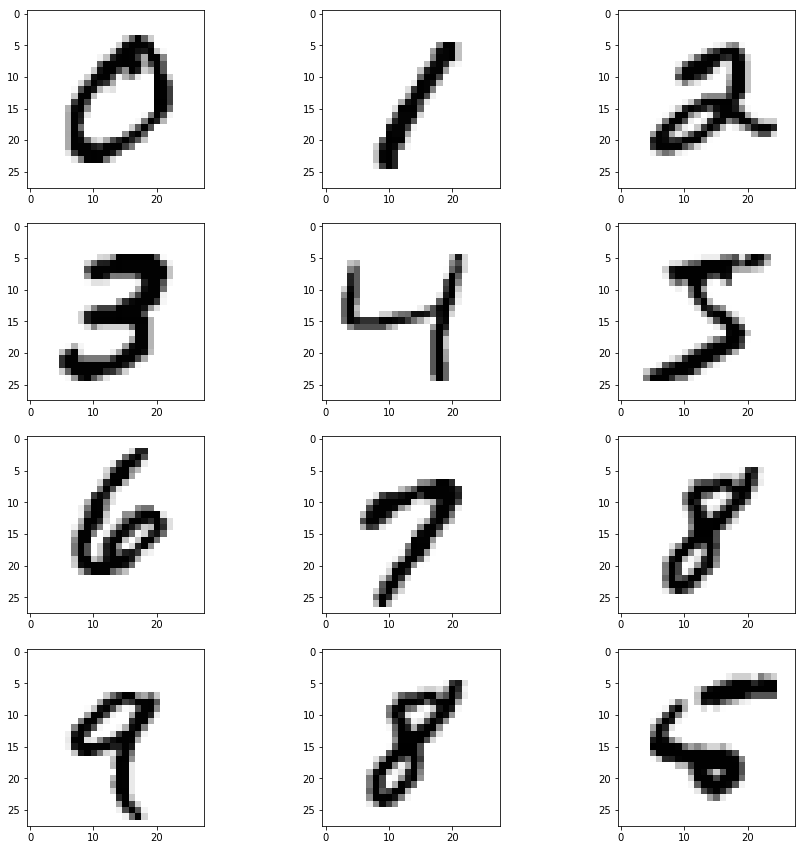

In [20]:
imagefile_train_data = 'train-images.idx3-ubyte'
imagefile_train_label = 'train-labels.idx1-ubyte'
imagefile_test_data = 't10k-images.idx3-ubyte'
imagefile_test_label = 't10k-labels.idx1-ubyte'
imagearray = idx2numpy.convert_from_file(imagefile_train_data)
imagearray_label = idx2numpy.convert_from_file(imagefile_train_label)
imagearray_test = idx2numpy.convert_from_file(imagefile_test_data)
imagearray_test_lable = idx2numpy.convert_from_file(imagefile_test_label)

fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9), (ax10, ax11, ax12)) = plt.subplots(4, 3, figsize=(15,15))
ax1.imshow(imagearray[1], cmap=plt.cm.binary)
ax2.imshow(imagearray[3], cmap=plt.cm.binary)
ax3.imshow(imagearray[5], cmap=plt.cm.binary)
ax4.imshow(imagearray[7], cmap=plt.cm.binary)
ax5.imshow(imagearray[2], cmap=plt.cm.binary)
ax6.imshow(imagearray[0], cmap=plt.cm.binary)
ax7.imshow(imagearray[13], cmap=plt.cm.binary)
ax8.imshow(imagearray[15], cmap=plt.cm.binary)
ax9.imshow(imagearray[17], cmap=plt.cm.binary)
ax10.imshow(imagearray[4], cmap=plt.cm.binary)
ax11.imshow(imagearray[17], cmap=plt.cm.binary)
ax12.imshow(imagearray_test[8], cmap=plt.cm.binary)
print(imagearray_test_lable[8])

In [37]:
imagearray.shape

(60000, 28, 28)

In [50]:
imagearray_label.shape

(60000,)

In [67]:
imagearray_test.shape

(10000, 28, 28)

In [70]:
imagearray_label_test.shape

(10000,)

In [44]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(25, activation='relu'),
    keras.layers.Dense(10)
])

In [45]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [49]:
model.fit(imagearray, imagearray_label, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.9602 - accuracy: 0.4118
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0830 - accuracy: 0.5969
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8947 - accuracy: 0.6672
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6677 - accuracy: 0.7974
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4782 - accuracy: 0.8762
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4258 - accuracy: 0.8910
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3998 - accuracy: 0.8955
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3749 - accuracy: 0.9015
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3499 - accuracy: 0.9080
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.335

In [15]:
#network

"""Return the sigmoid value or activation value of our neuron i:e it maps any value to a value between 0 to 1"""
def sigmoid(x):
    return 1/(1+np.exp(-x))

"""Return the derivative of the signoid function"""
def deriv_sigmoid(x):
    return x*(1-x)

def train(inputs,output,weights,weights1):
    
    x = inputs.T
    y = output.T
    """Giving the input to our network and calculating the outptut and
        storing it in l2"""
    
    l1 = sigmoid(np.dot(x,weights))
    l2 = sigmoid(np.dot(l1,weights1))

    """Calculating the error by subtracting our Networks output from expected output"""
    error = y - l2 
#     print(error)

    """This gives how much did our output layer contributed in our missed output"""
    l2_del = error * deriv_sigmoid(l2)

    
    """Calculating the error of out hidden layer"""
    error0 = l2_del.dot(weights1.T)
#     print(error0)
    
    """This gives how much did our hidden layer contributed in our missed output"""
    l1_del = error0 * deriv_sigmoid(l1)

    """updating the values of our weights by how much we missed"""
    weights1 += np.dot(l1.T,l2_del)
    weights += np.dot(x.T,l1_del)

    return weights,weights1,(error, error0)

In [12]:
#test

def feedforward(x,weights,weights1):

    l = x.T
    l1 = sigmoid(np.dot(l,weights))
    l2 = sigmoid(np.dot(l1,weights1))
    return l2;

def check(te_inputs,te_outputs,weights,weights1):

    correct = 0
    
    for i in range(len(te_inputs)):
        
        out = feedforward(te_inputs[i],weights,weights1)
        f_out = np.argmax(out)
        print(out,te_outputs[i] )
        if(f_out == te_outputs[i]):
            correct += 1
#             print(correct)

    print ("Accuracy of the Network is " , ((correct/10000)*100))

In [6]:
def vectorized_result(j):
    e = np.zeros((10, 1))
    e[j] = 1.0
    return e

In [7]:
#bar
def progress(count, total, cond=False):
    bar_len = 60
    filled_len = int(round(bar_len * count / float(total)))

    percents = round(100.0 * count / float(total), 1)
    bar = '|' * filled_len + '-' * (bar_len - filled_len)

    if cond == False:
        sys.stdout.write('[%s] %s%s\r' % (bar, percents, '%'))
        sys.stdout.flush()

    else:
        sys.stdout.write('[%s] %s%s' % (bar, percents, '%'))

In [18]:
np.random.seed(1)

"""randomly intitalising weights mapping input layer to hidden layer and
    hidden layer to output layer"""

weights = 2*np.random.random((784,25)) - 1
weights1 = 2*np.random.random((25,10)) - 1

# """Loading the MNIST data set into three lists two containg the training data
#     and the third one containing the test data"""

# tr_data, val_data, test_data = ml.load_data()

"""Fitting the 28*28 input image into a numpy array of 784*1 dimension"""

tr_inputs = [np.reshape(x, (784, 1)) for x in imagearray]

"""Converting the single output into a numpy array of 10 dimensions with 1 at
    the index of the output an 0 elsewhere"""

tr_outputs = [vectorized_result(x) for x in imagearray_label]

"""Loop to train the data taking an input of 10,000 images"""
for i in range(50000):

    weights , weights1, _  = train(tr_inputs[i],tr_outputs[i],weights,weights1)
    if(i % 500) == 0 :
        progress(i, 50000)
    if(i == 49999):
        _, _, error  = train(tr_inputs[i],tr_outputs[i],weights,weights1)
        print(error)
progress(50000, 50000, cond = True)

print ("\n")

print ("Network Trained and ready to be operated")

# te_inputs = [np.reshape(x, (784,1)) for x in imagearray_test]
# te_outputs = imagearray_label

# """Function to check the accuracy of our trained network by testing it on
#     unchecked data of 10,000 images"""
# check(te_inputs,te_outputs,weights,weights1)

/home/manoj/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in exp
  """


(array([[-0.0962648 , -0.0377292 , -0.05961997, -0.05207685, -0.12776646,
        -0.08574821, -0.04234259, -0.05234524,  0.90067299, -0.05972711]]), array([[-0.09953772, -0.01270616,  0.01364949, -0.03856683,  0.04594712,
        -0.10449183,  0.04718151,  0.02630788,  0.06776315,  0.01470289,
         0.02561323, -0.04641628,  0.02695722, -0.01136694, -0.05847617,
         0.01344891,  0.00377411, -0.00824445, -0.04079641, -0.02510281,
        -0.02037318, -0.13403237, -0.03125732,  0.03007256,  0.0385409 ]]))
[||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||] 100.0%

Network Trained and ready to be operated


In [14]:
te_inputs = [np.reshape(x, (784,1)) for x in imagearray_test]
te_outputs = imagearray_test_lable

"""Function to check the accuracy of our trained network by testing it on
    unchecked data of 10,000 images"""
check(te_inputs,te_outputs,weights,weights1)

/home/manoj/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in exp
  """


[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 7
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 2
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 1
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 0
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 4
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 1
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 4
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 9
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646

[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 9
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 9
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 2
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 1
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 9
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 4
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 8
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 7
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646

[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 3
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 6
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 5
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 5
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 7
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 2
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 2
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 7
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646

  0.04234259 0.05234524 0.09932701 0.05972711]] 1
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 1
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 2
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 1
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 5
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 3
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 3
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 9
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 7
[[0.09

[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 2
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 9
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 2
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 0
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 4
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 9
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 1
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 4
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646

  0.04234259 0.05234524 0.09932701 0.05972711]] 2
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 6
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 3
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 2
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 6
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 5
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 4
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 8
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 9
[[0.09

[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 9
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 6
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 3
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 8
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 0
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 9
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 9
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 6
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646

[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 7
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 3
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 9
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 7
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 6
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 9
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 1
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 3
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646

  0.04234259 0.05234524 0.09932701 0.05972711]] 5
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 3
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 8
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 3
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 1
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 4
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 5
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 6
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 8
[[0.09

[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 8
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 8
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 7
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 4
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 9
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 3
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 0
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 6
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646

  0.04234259 0.05234524 0.09932701 0.05972711]] 1
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 6
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 9
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 1
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 4
[[0.16956781 0.04084266 0.11061046 0.02745709 0.140477   0.05145315
  0.08614574 0.02841795 0.08171931 0.05129604]] 4
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 5
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 4
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 0
[[0.09

  0.04234259 0.05234524 0.09932701 0.05972711]] 1
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 1
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 7
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 1
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 5
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 3
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 4
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 6
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 9
[[0.09

[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 1
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 4
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 7
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 4
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 7
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 5
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 4
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 5
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646

  0.04234259 0.05234524 0.09932701 0.05972711]] 3
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 6
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 2
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 1
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 6
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 1
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 1
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 3
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 7
[[0.09

[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 7
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 1
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 4
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 5
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 6
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 0
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 5
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 2
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646

  0.04234259 0.05234524 0.09932701 0.05972711]] 2
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 1
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 0
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 5
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 5
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 2
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 0
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 2
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 2
[[0.09

  0.04234259 0.05234524 0.09932701 0.05972711]] 2
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 4
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 1
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 4
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 5
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 2
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 4
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 9
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 9
[[0.09

[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 1
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 2
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 9
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 1
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 9
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 9
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 4
[[0.9079819  0.05684561 0.06114863 0.05208901 0.00758892 0.1132548
  0.06307463 0.01551785 0.11961408 0.01448464]] 0
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 

[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 0
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 9
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 1
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 7
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 8
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 7
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 8
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 4
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646

[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 8
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 5
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 1
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 4
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 2
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 4
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 4
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 5
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646

  0.04234259 0.05234524 0.09932701 0.05972711]] 1
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 7
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 5
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 5
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 3
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 3
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 0
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 1
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 5
[[0.09

  0.04234259 0.05234524 0.09932701 0.05972711]] 8
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 2
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 7
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 4
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 5
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 2
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 0
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 3
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 9
[[0.09

  0.04234259 0.05234524 0.09932701 0.05972711]] 8
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 7
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 5
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 9
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 9
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 0
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 0
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 2
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 8
[[0.09

  0.04234259 0.05234524 0.09932701 0.05972711]] 3
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 1
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 0
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 1
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 2
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 5
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 9
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 2
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 1
[[0.09

[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 2
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 5
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 1
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 8
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 7
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 3
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 7
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 1
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646

  0.04234259 0.05234524 0.09932701 0.05972711]] 5
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 8
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 3
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 0
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 6
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 2
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 7
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 3
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 3
[[0.09

  0.04234259 0.05234524 0.09932701 0.05972711]] 8
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 5
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 3
[[0.9079819  0.05684561 0.06114863 0.05208901 0.00758892 0.1132548
  0.06307463 0.01551785 0.11961408 0.01448464]] 0
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 4
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 0
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 2
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 9
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 6
[[0.096

  0.04234259 0.05234524 0.09932701 0.05972711]] 1
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 8
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 9
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 3
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 4
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 0
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 7
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 9
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 6
[[0.09

[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 0
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 4
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 9
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 1
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 9
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 7
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 7
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 5
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646

[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 7
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 9
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 4
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 0
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 0
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 3
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 8
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 2
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646

[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 7
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 4
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 1
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 7
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 1
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 5
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 2
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 3
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646

  0.04234259 0.05234524 0.09932701 0.05972711]] 0
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 1
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 4
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 2
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 1
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 1
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 4
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 4
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 4
[[0.09

  0.04234259 0.05234524 0.09932701 0.05972711]] 6
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 3
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 8
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 6
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 4
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 2
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 0
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 9
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 4
[[0.09

[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 8
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 2
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 3
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 3
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 9
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 9
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 0
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 1
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646

  0.04234259 0.05234524 0.09932701 0.05972711]] 1
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 2
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 3
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 3
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 6
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 4
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 5
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 9
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 6
[[0.09

  0.04234259 0.05234524 0.09932701 0.05972711]] 2
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 2
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 6
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 4
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 4
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 3
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 9
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 6
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 1
[[0.09

[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 9
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 5
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 8
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 4
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 9
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 9
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 1
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 6
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646

[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 1
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 7
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 2
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 1
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 6
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 9
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 1
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 9
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646

  0.04234259 0.05234524 0.09932701 0.05972711]] 1
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 1
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 7
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 6
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 9
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 1
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 8
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 4
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 1
[[0.09

  0.04234259 0.05234524 0.09932701 0.05972711]] 9
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 7
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 2
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 1
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 1
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 3
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 7
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 5
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 3
[[0.09

[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 3
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 3
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 0
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 2
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 9
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 0
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 0
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 9
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646

[[0.16956781 0.04084266 0.11061046 0.02745709 0.140477   0.05145315
  0.08614574 0.02841795 0.08171931 0.05129604]] 5
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 9
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 0
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 8
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 8
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 4
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 5
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 8
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646

  0.04234259 0.05234524 0.09932701 0.05972711]] 6
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 7
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 4
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 3
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 0
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 7
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 5
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 0
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 7
[[0.09

  0.04234259 0.05234524 0.09932701 0.05972711]] 4
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 7
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 5
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 9
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 6
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 8
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 2
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 1
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 4
[[0.09

  0.04234259 0.05234524 0.09932701 0.05972711]] 9
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 3
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 9
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 2
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 8
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 2
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 7
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 1
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 8
[[0.09

[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 9
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 7
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 8
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 4
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 0
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 3
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 0
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 7
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646

  0.04234259 0.05234524 0.09932701 0.05972711]] 6
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 3
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 0
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 9
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 3
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 7
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 6
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 8
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 9
[[0.09

  0.04234259 0.05234524 0.09932701 0.05972711]] 6
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 5
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 4
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 1
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 9
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 9
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 2
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 7
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 8
[[0.09

  0.04234259 0.05234524 0.09932701 0.05972711]] 1
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 0
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 6
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 0
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 9
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 6
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 8
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 6
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 1
[[0.09

[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 4
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 7
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 5
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 2
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 9
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 4
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 5
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 8
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646

[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 7
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 9
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 6
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 2
[[0.16956781 0.04084266 0.11061046 0.02745709 0.140477   0.05145315
  0.08614574 0.02841795 0.08171931 0.05129604]] 6
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 2
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 2
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 9
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646

[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 2
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 4
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 8
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 4
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 6
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 5
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 0
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 1
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646

[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 5
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 6
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 7
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 0
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 1
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 2
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 3
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 4
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646

  0.04234259 0.05234524 0.09932701 0.05972711]] 0
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 1
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 2
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 3
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 4
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 5
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 6
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 7
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 8
[[0.09

  0.04234259 0.05234524 0.09932701 0.05972711]] 6
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 4
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 7
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 6
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 2
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 2
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 0
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 9
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 4
[[0.09

[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 4
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 5
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 6
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 7
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 8
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 0
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 1
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 2
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646

[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 3
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 4
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 4
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 6
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 0
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 0
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 2
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 0
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646

[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 2
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 3
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 1
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 4
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 2
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 0
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 0
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 7
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646

[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 7
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 8
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 3
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 4
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 8
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 8
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 5
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 2
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646

[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 9
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 1
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 7
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 1
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 2
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 3
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 5
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 9
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646

  0.04234259 0.05234524 0.09932701 0.05972711]] 5
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 5
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 6
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 6
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 3
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 5
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 2
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 5
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 9
[[0.09

[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 9
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 2
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 6
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 2
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 5
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 3
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 1
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 7
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646

  0.04234259 0.05234524 0.09932701 0.05972711]] 0
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 9
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 3
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 3
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 9
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 1
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 5
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 2
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 3
[[0.09

  0.04234259 0.05234524 0.09932701 0.05972711]] 1
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 2
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 3
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 4
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 7
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 8
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 1
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 3
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 5
[[0.09

[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 6
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 1
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 2
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 8
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 8
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 7
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 7
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 4
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646

  0.04234259 0.05234524 0.09932701 0.05972711]] 4
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 0
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 6
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 0
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 1
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 2
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 3
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 4
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 5
[[0.09

  0.04234259 0.05234524 0.09932701 0.05972711]] 7
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 2
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 1
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 3
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 9
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 3
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 8
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 7
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 5
[[0.09

[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 9
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 9
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 5
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 8
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 6
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 7
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 0
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 6
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646

  0.04234259 0.05234524 0.09932701 0.05972711]] 9
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 8
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 4
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 0
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 0
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 7
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 2
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 4
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 3
[[0.09

  0.04234259 0.05234524 0.09932701 0.05972711]] 2
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 3
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 4
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 5
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 6
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 7
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 8
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 9
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 0
[[0.09

[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 9
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 8
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 8
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 9
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 0
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 9
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 8
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 9
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646

[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 9
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 2
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 4
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 5
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 5
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 3
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 7
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 5
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646

[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 5
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 5
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 9
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 9
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 1
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 1
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 5
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 7
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646

[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 5
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 7
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 2
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 5
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 9
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 6
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 9
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 2
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646

[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 1
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 8
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 6
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 7
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 5
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 9
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 9
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 3
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646

[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 0
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 1
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 2
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 3
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 4
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 5
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 6
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 7
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646

[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 3
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 8
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 9
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 0
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 7
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 2
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 3
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 4
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646

  0.04234259 0.05234524 0.09932701 0.05972711]] 9
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 7
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 0
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 2
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 1
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 0
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 3
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 6
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 0
[[0.09

[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 2
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 1
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 6
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 8
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 8
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 0
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 1
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 2
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646

[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 6
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 0
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 0
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 1
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 2
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 3
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 4
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 5
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646

[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 5
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 4
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 7
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 1
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 3
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 1
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 7
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 9
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646

[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 2
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 9
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 2
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 0
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 9
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 3
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 3
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 9
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646

[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 9
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 3
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 5
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 3
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 2
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 9
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 3
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 2
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646

[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 0
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 9
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 5
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 6
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 0
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 1
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 0
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 6
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646

  0.04234259 0.05234524 0.09932701 0.05972711]] 7
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 8
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 9
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 0
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 1
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 7
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 8
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 9
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 8
[[0.09

[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 0
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 7
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 6
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 1
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 1
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 0
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 1
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 2
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646

[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 2
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 3
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 4
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 5
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 6
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 7
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 8
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 9
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646

  0.04234259 0.05234524 0.09932701 0.05972711]] 4
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 9
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 9
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 6
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 7
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 1
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 2
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 5
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 3
[[0.09

  0.04234259 0.05234524 0.09932701 0.05972711]] 3
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 4
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 6
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 1
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 1
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 5
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 5
[[0.68740796 0.20718562 0.07111473 0.01005167 0.06325467 0.09142545
  0.01963753 0.01896203 0.05344479 0.01382228]] 0
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 7
[[0.09

  0.04234259 0.05234524 0.09932701 0.05972711]] 5
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 9
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 6
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 0
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 6
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 5
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 5
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 3
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 3
[[0.09

[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 6
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 7
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 8
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 9
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 1
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 0
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 1
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 2
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646

  0.04234259 0.05234524 0.09932701 0.05972711]] 0
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 6
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 0
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 0
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 2
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 3
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 7
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 9
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 4
[[0.09

  0.04234259 0.05234524 0.09932701 0.05972711]] 7
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 5
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 8
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 5
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 3
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 2
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 2
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 0
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 5
[[0.09

[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 6
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 9
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 1
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 1
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 1
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 2
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 1
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 2
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646

  0.04234259 0.05234524 0.09932701 0.05972711]] 1
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 7
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 7
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 8
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 4
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 6
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 0
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 7
[[0.0962648  0.0377292  0.05961997 0.05207685 0.12776646 0.08574821
  0.04234259 0.05234524 0.09932701 0.05972711]] 0
[[0.09

In [19]:
print(te_inputs[0],te_inputs[0])

[[  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]